<a href="https://colab.research.google.com/github/jpthirumalai/aiml/blob/master/Thiru_Sentiment_analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Classification


## Loading the dataset

In [1]:
from keras.datasets import imdb

vocab_size = 10000 #vocab size

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size) # vocab_size is no.of words to consider from the dataset, ordering based on frequency.

Using TensorFlow backend.


17465344/17464789 [==============================] - 1s 0us/step


In [0]:
from keras.preprocessing.sequence import pad_sequences
vocab_size = 10000 #vocab size
maxlen = 300  #number of word used from each review

## Train test split

In [0]:
#load dataset as a list of ints
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)
#make all sequences of the same length
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test =  pad_sequences(x_test, maxlen=maxlen)

In [0]:
import numpy as np
# X = np.concatenate((x_train, x_test), axis=0)
# Y = np.concatenate((y_train, y_test), axis=0)
X = np.concatenate((x_train, x_test), axis=0)
Y = np.concatenate((y_train, y_test), axis=0)

## Exploring Data

In [5]:
print("Categories:", np.unique(Y))
print("Number of unique words:", len(np.unique(np.hstack(X))))

length = [len(i) for i in X]
print("Average Review length:", np.mean(length))
print("Standard Deviation:", round(np.std(length)))

print("Number of Negative reviews ",Y[Y==0].size)
print("Number of Positive reviews ",Y[Y==1].size)

Categories: [0 1]
Number of unique words: 9999
Average Review length: 300.0
Standard Deviation: 0.0
Number of Negative reviews  25000
Number of Positive reviews  25000


### Dataset is Eauivally distributed labels - Number of positeve reviews 25000 & negative reviews 25000

In [6]:
print("Label:", Y[10])
print("Data:", X[10])

Label: 1
Data: [   6  346  137   11    4 2768  295   36 7740  725    6 3208  273   11
    4 1513   15 1367   35  154    2  103    2  173    7   12   36  515
 3547   94 2547 1722    5 3547   36  203   30  502    8  361   12    8
  989  143    4 1172 3404   10   10  328 1236    9    6   55  221 2989
    5  146  165  179  770   15   50  713   53  108  448   23   12   17
  225   38   76 4397   18  183    8   81   19   12   45 1257    8  135
   15    2  166    4  118    7   45    2   17  466   45    2    4   22
  115  165  764 6075    5 1030    8 2973   73  469  167 2127    2 1568
    6   87  841   18    4   22    4  192   15   91    7   12  304  273
 1004    4 1375 1172 2768    2   15    4   22  764   55 5773    5   14
 4233 7444    4 1375  326    7    4 4760 1786    8  361 1236    8  989
   46    7    4 2768   45   55  776    8   79  496   98   45  400  301
   15    4 1859    9    4  155   15   66    2   84    5   14   22 1534
   15   17    4  167    2   15   75   70  115   66   30  252  

In [7]:
def decode_review(n):
    index = imdb.get_word_index()
    reverse_index = dict([(value, key) for (key, value) in index.items()]) 
    decoded = " ".join( [reverse_index.get(i - 3, "#") for i in X[n]] )
    return decoded
print(decode_review(10)) 

1646592/1641221 [==============================] - 1s 0us/step
a short while in the cell together they stumble upon a hiding place in the wall that contains an old # after # part of it they soon realise its magical powers and realise they may be able to use it to break through the prison walls br br black magic is a very interesting topic and i'm actually quite surprised that there aren't more films based on it as there's so much scope for things to do with it it's fair to say that # makes the best of it's # as despite it's # the film never actually feels restrained and manages to flow well throughout director eric # provides a great atmosphere for the film the fact that most of it takes place inside the central prison cell # that the film feels very claustrophobic and this immensely benefits the central idea of the prisoners wanting to use magic to break out of the cell it's very easy to get behind them it's often said that the unknown is the thing that really # people and this film p

In [8]:
print("Data size",X.shape)
print("Label size",Y.shape)

Data size (50000, 300)
Label size (50000,)


In [0]:
## Train Test Split 80:20 ratio that is 40K:10K
x_test = X[:10000] #get first 10000 as test
y_test = Y[:10000]

x_train = X[10000:] #from 10000 till 50k total 40000 as train data
y_train = Y[10000:]

In [10]:
print("Train data size",x_train.shape)
print("Test data size",x_test.shape)

print("Train Label size",y_train.shape)
print("Test Label size",y_train.shape)


Train data size (40000, 300)
Test data size (10000, 300)
Train Label size (40000,)
Test Label size (40000,)


## Build Keras Embedding Layer Model
We can think of the Embedding layer as a dicionary that maps a index assigned to a word to a word vector. This layer is very flexible and can be used in a few ways:

* The embedding layer can be used at the start of a larger deep learning model. 
* Also we could load pre-train word embeddings into the embedding layer when we create our model.
* Use the embedding layer to train our own word2vec models.

The keras embedding layer doesn't require us to onehot encode our words, instead we have to give each word a unqiue intger number as an id. For the imdb dataset we've loaded this has already been done, but if this wasn't the case we could use sklearn [LabelEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html).

In [11]:
embed_dim = 2
lstm_out = 196
vocabulary = imdb.get_word_index()
vocabSize = len(vocabulary)
print("Embedding Dimension",embed_dim)
print("Vocabulary size",vocabSize)


Embedding Dimension 2
Vocabulary size 88584


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Dropout, LSTM, SpatialDropout1D, Flatten



model = Sequential()
model.add(Embedding(vocabSize, embed_dim,input_length = 300))
model.add(Flatten())
# dropout regularization
model.add(Dropout(rate=0.5))

# small dense layer. It's role is to analyze the distribution of points from embedding
model.add(Dense(5))

# final neuron, with sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# model.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2))
# model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# summarize the model
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 2)            177168    
_________________________________________________________________
flatten (Flatten)            (None, 600)               0         
_________________________________________________________________
dropout (Dropout)            (None, 600)               0         
_________________________________________________________________
dense (Dense)                (None, 5)                 3005      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 180,179
Trainable params: 180,179
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
batch_size = 100
# fit the model
history = model.fit(x_train, y_train, validation_split=0.3, epochs=20, batch_size=batch_size, verbose = 2)
# evaluate the model
# loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
# print('Accuracy: %f' % (accuracy*100))
# print(model.summary())

Epoch 1/20
280/280 - 2s - loss: 0.6590 - accuracy: 0.5962 - val_loss: 0.4959 - val_accuracy: 0.8101
Epoch 2/20
280/280 - 2s - loss: 0.3854 - accuracy: 0.8344 - val_loss: 0.2905 - val_accuracy: 0.8852
Epoch 3/20
280/280 - 2s - loss: 0.2917 - accuracy: 0.8792 - val_loss: 0.2632 - val_accuracy: 0.8900
Epoch 4/20
280/280 - 2s - loss: 0.2599 - accuracy: 0.8928 - val_loss: 0.2559 - val_accuracy: 0.8966
Epoch 5/20
280/280 - 2s - loss: 0.2415 - accuracy: 0.9028 - val_loss: 0.2511 - val_accuracy: 0.8971
Epoch 6/20
280/280 - 2s - loss: 0.2292 - accuracy: 0.9075 - val_loss: 0.2578 - val_accuracy: 0.8937
Epoch 7/20
280/280 - 2s - loss: 0.2222 - accuracy: 0.9095 - val_loss: 0.2536 - val_accuracy: 0.8963
Epoch 8/20
280/280 - 1s - loss: 0.2181 - accuracy: 0.9120 - val_loss: 0.2546 - val_accuracy: 0.8940
Epoch 9/20
280/280 - 2s - loss: 0.2082 - accuracy: 0.9149 - val_loss: 0.2570 - val_accuracy: 0.8946
Epoch 10/20
280/280 - 1s - loss: 0.2043 - accuracy: 0.9173 - val_loss: 0.2614 - val_accuracy: 0.8942

In [14]:
# evaluate the model
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
print('Accuracy: %f{0}'.format(accuracy*100))

313/313 [==============================] - 1s 2ms/step - loss: 0.2967 - accuracy: 0.8815
Accuracy: %f88.15000057220459


In [15]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [0]:
import matplotlib.pyplot as plt
def plot_accuracy(history, miny=None):
    acc = history.history['accuracy']
    test_acc = history.history['val_accuracy']
    epochs = range(len(acc))
    plt.plot(epochs, acc)
    plt.plot(epochs, test_acc)
    if miny:
        plt.ylim(miny, 1.0)
        plt.title('accuracy') 
        plt.xlabel('epoch')
        plt.figure()

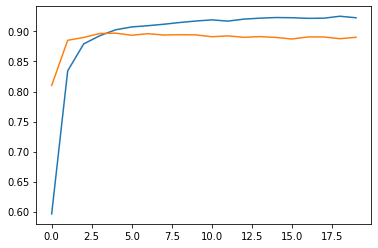

In [17]:
plot_accuracy(history)

## From the above graph it is ensured the model is not overfitting

In [18]:
print(X[34])
print(decode_review(34))

[   9  918    8 6651    4  455    2    4 2335  832   32    4   96    8
    4 9877 1903    2    7    4    2 4681  121  132    5 2773  297   46
   68  477 3610  985  429  257   85   10   10  107  183  759   46   11
   14   22   31    9    4 2299  603   34    2    2  382    4  833 5102
    7   22  228    7   32   58   27 1956 1053   23  998    2  967    2
  315    4 2226    5 2084    4   85    9    4  480 5633 1381    7 2901
 2567   63  166    4   22 4152 5754    8    4  744   11  175   85 2550
    2  475  455 4127    9    6 5360   22   15  127  164    8 6802    4
 2577    7   94 1020  177    5 1051 2173  739  576 1815  469    4   22
   27 1153    2  328 2666  187   27  523    5 2391    2 6521   27  239
 1503    4  644    2    2 3372    6  176    7 1279 6840   21  996    8
 2522   19   41  196    2    5 1815 6524 8920   44    4  771    7    2
    4  360    7    4  156   26 1053   11 1420    5 9364  555    4   91
  906    7   63 1085 3281 3544  397   41 3967 5706  125   34    4 9539
 4127 

In [0]:
from nltk import word_tokenize

def vectorize(reviewsequence,max_review_length=300):
    words = word_tokenize( reviewsequence)
#     print(len(words))
    word2index = imdb.get_word_index()
    result=[]
    for word in words:
        try:
            word_index = word2index[word]+3
            if word=='#':
                continue
            else:
                if word_index>=10000:
                    continue
                else:
                    result.append(word_index)
        except KeyError:
            continue
#     print("Length of given review: {0}".format(len(result)))
#    result=pad_sequences([result],maxlen=max_review_length)
    return result

In [21]:
 import nltk
 nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [23]:
a = vectorize(decode_review(34),300)
print(a)
Y[34]

[9, 918, 8, 6651, 4, 455, 4, 2335, 832, 32, 4, 96, 8, 4, 9877, 1903, 7, 4, 4681, 121, 132, 5, 2773, 297, 46, 68, 477, 3610, 985, 429, 257, 85, 10, 10, 107, 183, 759, 46, 11, 14, 22, 31, 9, 4, 2299, 603, 34, 382, 4, 833, 5102, 7, 22, 228, 7, 32, 58, 27, 1956, 1053, 23, 998, 967, 315, 4, 2226, 5, 2084, 4, 85, 9, 4, 480, 5633, 1381, 7, 2901, 2567, 63, 166, 4, 22, 4152, 5754, 8, 4, 744, 11, 175, 85, 2550, 475, 455, 4127, 9, 6, 5360, 22, 15, 127, 164, 8, 6802, 4, 2577, 7, 94, 1020, 177, 5, 1051, 2173, 739, 576, 1815, 469, 4, 22, 27, 1153, 328, 2666, 187, 27, 523, 5, 2391, 6521, 27, 239, 1503, 4, 644, 3372, 6, 176, 7, 1279, 6840, 21, 996, 8, 2522, 19, 41, 196, 5, 1815, 6524, 8920, 44, 4, 771, 7, 4, 360, 7, 4, 156, 26, 1053, 11, 1420, 5, 9364, 555, 4, 91, 906, 7, 63, 1085, 3281, 3544, 397, 41, 3967, 5706, 125, 34, 4, 9539, 4127, 4, 114, 9, 964, 1835, 39, 380, 8, 1363, 19, 141, 5400, 844, 17, 4, 4127, 4042, 1861, 6, 968, 11, 4, 5244, 2059, 15, 5, 6082, 4, 719, 261, 12, 3579, 3084, 8, 1408, 15,

0

#### Above print of elements of 34th review -  Verified getting the same list again - Verified and Decode and Vetorize

In [24]:
print(decode_review(0))
Y[0]

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert # is an amazing actor and now the same being director # father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for # and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also # to the two little boy's that played the # of norman and paul they were just brilliant children are often left out of the # list i think because the st

1

## Retrive the output of each layer in keras for a given single test sample from the trained model you built

In [0]:
import keras
word2index = imdb.get_word_index()

# embedding_5 (Embedding)      (None, 300, 128)          1280000   
# _________________________________________________________________
# flatten_4 (Flatten)          (None, 38400)             0         
# _________________________________________________________________
# dropout (Dropout)            (None, 38400)             0         
# _________________________________________________________________
# dense_5 (Dense)              (None, 5)                 192005    
# _________________________________________________________________
# dense_6 (Dense)              (None, 1)                 6         
# =================================================================

get_embed_out = keras.backend.function(
    [model.layers[0].input],
    [model.layers[1].output])
get_flatten_out = keras.backend.function(
    [model.layers[1].input],
    [model.layers[1].output])
get_drop_out = keras.backend.function(
    [model.layers[2].input],
    [model.layers[1].output])
get_dense1_out = keras.backend.function(
    [model.layers[3].input],
    [model.layers[1].output])
get_dense2_out = keras.backend.function(
    [model.layers[4].input],
    [model.layers[1].output])

In [0]:
def get_layer_info(name, layer):
    print(colored("Layer name: {0}".format(name),"blue"))
    layer_output = layer([x_test[0]])
    print("Type {0} length of output layer {1} layer output {2}".format(type(layer_output), len(layer_output), layer_output[0].shape))
    print("The output is: ",layer_output)
    return layer_output

In [0]:
from termcolor import colored

In [28]:
get_layer_info("Embedding layer",get_embed_out)
# get_layer_info("Flatten layer",get_flatten_out)
get_layer_info("Dropout layer",get_drop_out)
# get_layer_info("Dense layer 1",get_dense1_out)
# get_layer_info("Dense layer 2",get_dense2_out)

Layer name: Embedding layer
Type <class 'list'> length of output layer 1 layer output (1, 600)
The output is:  [array([[ 0.00224782,  0.00373507,  0.00224782,  0.00373507,  0.00224782,
         0.00373507,  0.00224782,  0.00373507,  0.00224782,  0.00373507,
         0.00224782,  0.00373507,  0.00224782,  0.00373507,  0.00224782,
         0.00373507,  0.00224782,  0.00373507,  0.00224782,  0.00373507,
         0.00224782,  0.00373507,  0.00224782,  0.00373507,  0.00224782,
         0.00373507,  0.00224782,  0.00373507,  0.00224782,  0.00373507,
         0.00224782,  0.00373507,  0.00224782,  0.00373507,  0.00224782,
         0.00373507,  0.00224782,  0.00373507,  0.00224782,  0.00373507,
         0.00224782,  0.00373507,  0.00224782,  0.00373507,  0.00224782,
         0.00373507,  0.00224782,  0.00373507,  0.00224782,  0.00373507,
         0.00224782,  0.00373507,  0.00224782,  0.00373507,  0.00224782,
         0.00373507,  0.00224782,  0.00373507,  0.00224782,  0.00373507,
         0.0

[array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

In [29]:
get_embed_out = keras.backend.function(
    [model.layers[0].input],
    [model.layers[0].output])
layer_output = get_embed_out([x_test[0]])
print(type(layer_output), len(layer_output), layer_output[0].shape)

<class 'list'> 1 (300, 2)


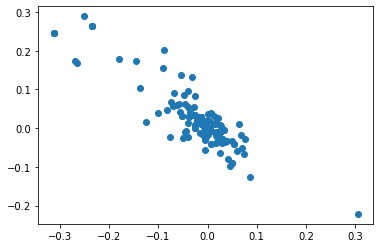

In [30]:
words = layer_output[0]
# print(words)
plt.scatter(words[:,0], words[:,1])

# Verifying custom review - live review from IMDb

In [0]:
import math
def verify_review(myreview):
    #vectorizing the review by the pre-fitted tokenizer instance
    review_vector = vectorize(myreview,300)

    # print(review_vector)

    review_vector=pad_sequences([review_vector],maxlen=maxlen)
    # print('Result',model.predict(review_vector,batch_size=1,verbose = 2))
    sentiment = model.predict(review_vector,batch_size=1,verbose = 2)[0]
#     print('Sentiment:',sentiment)
    if(sentiment[0] > 0.9):
        print(colored("This review is Positive","green"))
    else:
        print(colored("This review is Negative","red"))

In [32]:
#Verifying an existing review at index 34 which is a negative review
myreview = 'is forced to pursue the killer  the hunt leads all the way to the desolate ice  of the  ocean where man and beast play out their final fatal battle against each other br br two things stand out in this film one is the haunting score by   perhaps the greatest composer of film music of all time his talents wasted on various  rate  during the 70s and 80s the other is the amazing widescreen photography of ted moore which makes the film consistently pleasing to the eye in every other department  killer whale is a shoddy film that does nothing to enhance the reputation of its talented cast and crew harris appears extremely ill throughout the film his hair  black rings around his eyes and skin  pale his performance lacks the usual   strikes a lot of sexy poses but fails to convince with her long  and ill informed explanations about the ways of  the rest of the actors are wasted in brief and undeveloped roles the most memorable of which sees bo derek getting her leg bitten off by the vengeful whale the plot is total nonsense from start to finish with such preposterous sequences as the whale deliberately starting a fire in the fishing village that  and destroys the local  although it\'s credible to suppose that  are intelligent creatures with genuine emotions the idea that a whale could plot revenge against a single human  and carry it out so  is utterly absurd  killer whale is really one for  of the man vs beast cycle from the late 70s most will come away from the film shaking their heads in disbelief and  their teeth with despair'
print("My review length",len(myreview))

verify_review(myreview)

My review length 1547
1/1 - 0s
This review is Negative


### Verifying a review of the movie Onward https://www.imdb.com/review/rw5572599/?ref_=tt_urv a movie with 9/10 rating

In [33]:
myreview = 'WOW Pixar is really moving onward with creativity and originality While the story itself and plotting may suffer a few issues like predictibility at times amazing animation and stunning visuals along with beautifully designed characters and great chemistry beetween actors who voiced those characters perfectly make this movie great enjoyable and worth watching The way they\'ve used a mixture of real life elements and fantasy elements from Dungeons and Dragons universe is also great and worth mentioning While at first look it doesn\'t feel like a Pixar movie the more time you spend watching it you will get all feelings and heart you expect from your average Pixar movie Dan Scanlon did a great job this time'

print("My review length",len(myreview))

verify_review(myreview)


My review length 711
1/1 - 0s
This review is Positive


In [0]:
#### predicting correctly as <font color='green'>Positive</font> review

### Verifying a review of the movie Dod eat Dog https://www.imdb.com/review/rw3579490/?ref_=tt_urv . a movie with 1/10 rating

In [35]:
myreview = 'I am a fan of Nicholas Cage who believes that his movies are just below the top grade but enjoyable at most times I read the storyline in IMDb and was seriously looking forward to have a good time Boy i was wrong There was no story no thrills but cheap gun shooting action I went all the way to write a review as i believe that this review could save someone their 90 minutes By the way this is only my 3rd review ever in the last 8 years the other 2 being positives and this one for the sheer disappointment i had with the movie Pls avoid this movie unless you are a blood thirsty movie lover'

verify_review(myreview)

1/1 - 0s
This review is Negative


In [0]:
#### Predicting correctly as <font color='red'>Negative</font> review